<a href="https://colab.research.google.com/github/All-Natural/python/blob/master/EDA%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv("IBM HR Data (Edited).csv")
data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41.0,1102.0,1.0,2.0,2.0,Female,94.0,2.0,4.0,5993.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1
1,37.0,807.0,6.0,4.0,1.0,Female,37.0,2.0,4.0,5993.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1
2,41.0,1102.0,1.0,2.0,2.0,Female,94.0,2.0,4.0,5993.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1
3,37.0,807.0,6.0,4.0,1.0,Female,37.0,2.0,4.0,5993.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1
4,37.0,807.0,6.0,4.0,1.0,Female,37.0,2.0,4.0,5993.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,34.0,1381.0,4.0,4.0,3.0,Female,72.0,2.0,3.0,6538.0,...,80.0,1.0,6.0,NaN,3.0,3.0,2.0,1.0,2.0,0
23416,37.0,889.0,9.0,3.0,3.0,Female,77.0,1.0,4.0,3760.0,...,80.0,3.0,3.0,5.0,3.0,3.0,2.0,1.0,2.0,0
23417,55.0,177.0,8.0,1.0,4.0,Female,84.0,3.0,1.0,10008.0,...,80.0,0.0,31.0,3.0,3.0,2.0,0.0,2.0,2.0,0
23418,27.0,1134.0,16.0,4.0,4.0,Male,98.0,1.0,2.0,2991.0,...,80.0,1.0,7.0,2.0,3.0,6.0,2.0,1.0,2.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23420 entries, 0 to 23419
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23417 non-null  float64
 1   DailyRate                 23409 non-null  float64
 2   DistanceFromHome          23411 non-null  float64
 3   Education                 23408 non-null  float64
 4   EnvironmentSatisfaction   23411 non-null  float64
 5   Gender                    23412 non-null  object 
 6   HourlyRate                23411 non-null  float64
 7   JobLevel                  23413 non-null  float64
 8   JobSatisfaction           23411 non-null  float64
 9   MonthlyIncome             23408 non-null  float64
 10  MonthlyRate               23409 non-null  float64
 11  NumCompaniesWorked        23411 non-null  float64
 12  Over18                    23410 non-null  object 
 13  OverTime                  23410 non-null  object 
 14  Percen

In [ ]:
data_or = data
data_or['Gender'] = data['Gender'].astype(str)

In [ ]:
y1 = data_or[data_or['Gender'].str.contains('1')]
y2 = data_or[data_or['Gender'].str.contains('2')]

In [ ]:
test1 = list(y1.Gender)
test2 = list(y2.Gender)
test = list(data_or.Gender)
reset = list(set(test) ^ set(test1))
reset = list(set(reset) ^ set(test2))
data_or = data_or[data_or.Gender.isin(reset)]
data_or.dropna(subset=['Gender'],inplace=True)
data = data_or[data_or['Gender'].notnull()]

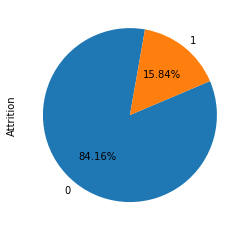

In [ ]:
# 做一些简单的EDA工作，首先分析基本离职率
data['Attrition'].value_counts().plot.pie(labeldistance = 1.1,autopct = '%1.2f%%',
                                               shadow = False,startangle = 80,pctdistance = 0.6)

In [ ]:
# 首先做的是单因素分析
# 定义一个离散单因素分析的绘图函数
def discrete_plot(data,col_name,label):
    """
    变量为离散型分布
    第1张：按类饼图
    第2张：按类计数（检查是否是由离群特殊值导致分布）
    """
    f,ax = plt.subplots(1, 2, figsize=(18, 6))
    data[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=False, cmap='winter_r')
    sns.countplot(col_name, hue=label,data=data, ax=ax[1], palette='winter')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
    print(data[[col_name,label]].groupby([col_name]).mean())

In [ ]:
# 定义一个连续单因素分析的绘图函数
def continue_plot(data,col_name,label):
    """
    变量为连续型分布
    第1张：连续分布图
    第2张：箱线图
    """
    f,ax = plt.subplots(1, 2, figsize=(18, 6))
    sns.distplot(data.Age[data.Attrition == 1],ax=ax[0])
    sns.distplot(data.Age[data.Attrition == 0],ax=ax[0])
    plt.legend(['1','0'])
    
    sns.boxplot(y=col_name, x=label,data=data, palette='Set2', ax=ax[1])

        Attrition
Gender           
Female   0.153583
Male     0.161649
nan      0.000000


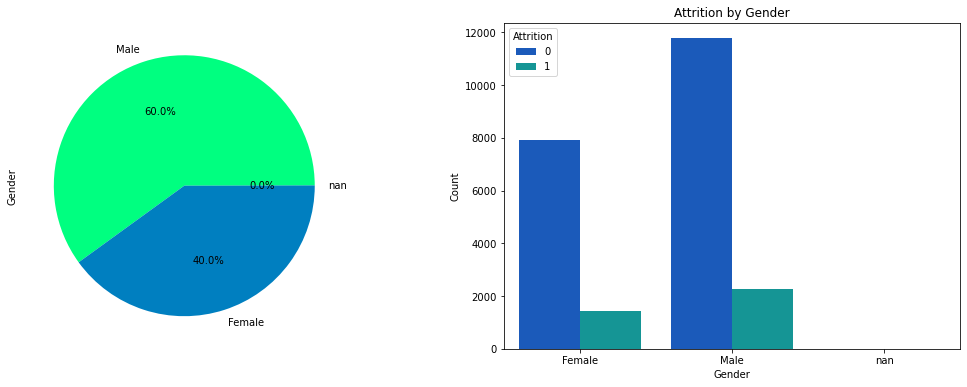

In [ ]:
discrete_plot(data_or,'Gender','Attrition')

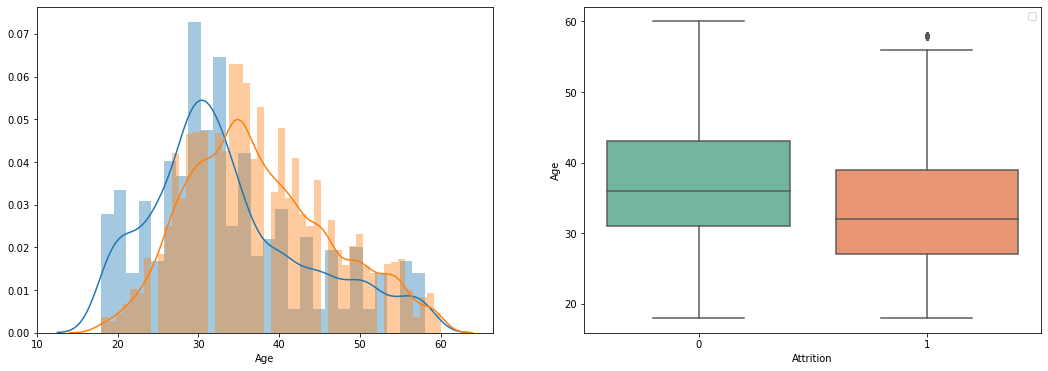

In [ ]:
# 职工年龄与是否离职的关系
continue_plot(data,'Age','Attrition')
# 可以基本确定两个分布存在差异，年龄越低，流动性越高

In [ ]:
# 准备做双因素分析
def two_discrete_plot(data,col1,col2,lable):
    print(data[[col1,col2,lable]].groupby([col1,col2]).mean())
    data[[col1,col2,lable]].groupby([col1,col2]).mean().plot.bar()

          Attrition
OverTime           
No         0.124672
Yes        0.243891


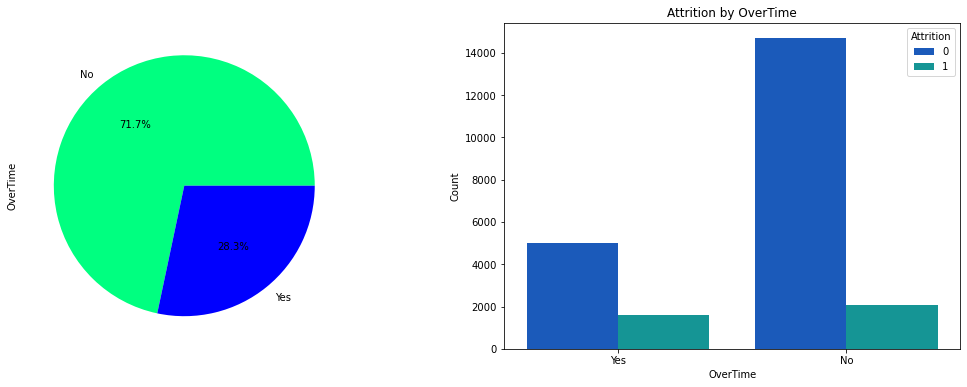

In [ ]:
# 前文我们已经知道，性别可能造成流动性差异，那么是什么导致了这样的差异呢？
# 我们引入加班因素做准备做双因素分析，首先审视一下加班的基本信息
discrete_plot(data,'OverTime','Attrition')

                 Attrition
Gender OverTime           
Female No         0.117566
       Yes        0.235975
Male   No         0.129236
       Yes        0.249934
nan    No         0.000000
       Yes        0.000000


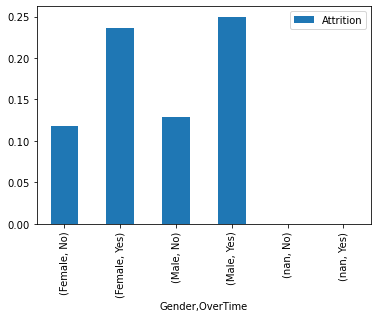

In [ ]:
two_discrete_plot(data,'Gender','OverTime','Attrition') # 引入性别

In [ ]:
def select_two_discrete_plot(data,col_select,col_value,col1,col2,label):
    #data_X=data.loc[data[col_select]==col_value,[col1,col2,label]]
    data_X=data[data[col_select]==col_value]                       
    print(data_X[[col1,col2,label]].groupby([col1,col2]).count())  #因为分的类别比较多，要检查是否存在极端个例
    print("-----------------------------------------")
    two_discrete_plot(data_X,col1,col2,label)

                          Attrition
OverTime WorkLifeBalance           
No       1.0                    389
         2.0                   1406
         3.0                   4029
         4.0                    682
Yes      1.0                     88
         2.0                    762
         3.0                   1780
         4.0                    220
-----------------------------------------
                          Attrition
OverTime WorkLifeBalance           
No       1.0               0.169666
         2.0               0.133001
         3.0               0.103500
         4.0               0.139296
Yes      1.0               0.340909
         2.0               0.200787
         3.0               0.244382
         4.0               0.250000


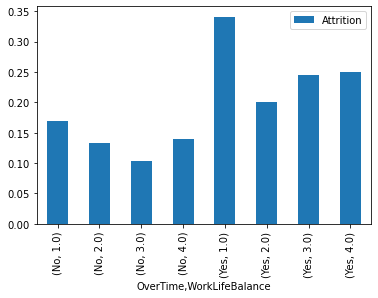

In [ ]:
# 首先考虑加班是否会影响工作生活平衡
select_two_discrete_plot(data,'Gender','Female','OverTime','WorkLifeBalance','Attrition')

                          Attrition
OverTime WorkLifeBalance           
No       1.0                    523
         2.0                   2411
         3.0                   6162
         4.0                   1168
Yes      1.0                    268
         2.0                    890
         3.0                   2253
         4.0                    365
-----------------------------------------
                          Attrition
OverTime WorkLifeBalance           
No       1.0               0.151052
         2.0               0.126918
         3.0               0.129503
         4.0               0.123288
Yes      1.0               0.294776
         2.0               0.284270
         3.0               0.239680
         4.0               0.197260


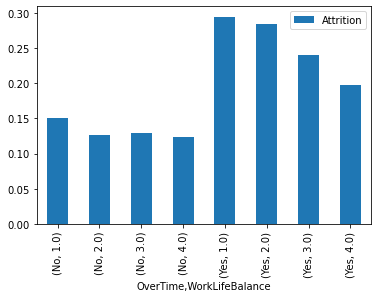

In [ ]:
select_two_discrete_plot(data,'Gender','Male','OverTime', 'WorkLifeBalance','Attrition')
# 仔细分析，我们至少可以得到几个结论
# 在不加班的情况下，男女对于工作生活的平衡度基本相同
# 在加班的情况下，能够调理好工作生活平衡的男人越来越少，也就会导致越来越多的离职，而女性在加班的情况下普遍都很难协调好自己的平衡

                          Attrition
JobSatisfaction JobLevel           
1.0             1.0            1014
                2.0             993
                3.0             401
                4.0             208
                5.0              77
2.0             1.0             978
                2.0             939
                3.0             347
                4.0             148
                5.0             171
3.0             1.0            1683
                2.0            1371
                3.0             638
                4.0             270
                5.0             249
4.0             1.0            1795
                2.0            1711
                3.0             575
                4.0             250
                5.0             224
-----------------------------------------
                          Attrition
JobSatisfaction JobLevel           
1.0             1.0        0.273176
                2.0        0.182276
                3.0   

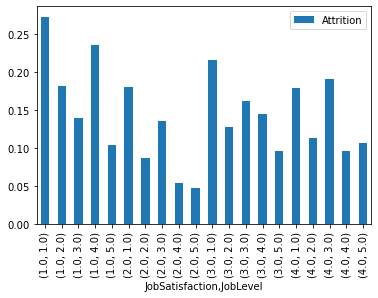

In [ ]:
select_two_discrete_plot(data,'Gender','Male','JobSatisfaction','JobLevel','Attrition')

按照此类方法还可以分析多种情况对于离职的影响

#### 离散变量 & 连续变量

In [ ]:
def continue_discrete_plot(data,col_con,col_dis,label):
    fig,ax = plt.subplots(figsize = (9,5))
    sns.violinplot(col_dis,col_con,hue=label,data=data,split=True)
    ax.set_title(f'{col_dis} and {col_con} vs {label}') 
    plt.show()

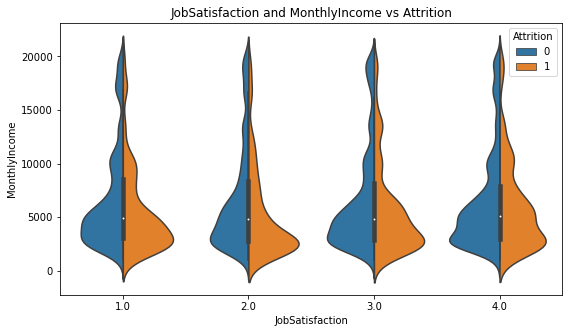

In [ ]:
continue_discrete_plot(data,'MonthlyIncome','JobSatisfaction','Attrition')
# 我们刚刚看到了对于工作环境的满意程度也会影响离职率，如果我们提高他们的月收入会不会解决这个问题
# 我们也看到了高薪人员离职很低

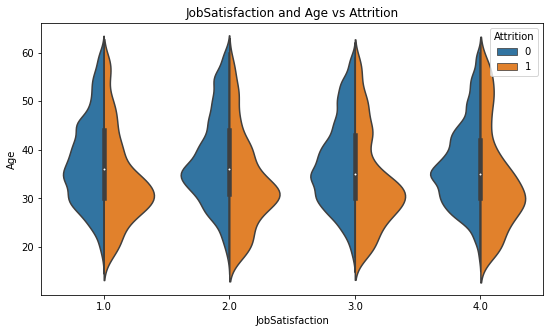

In [ ]:
continue_discrete_plot(data,'Age','JobSatisfaction','Attrition') # 年龄

#### 连续变量&连续变量

In [ ]:
def two_continue_plot(data,colx,coly,label):
    sns.kdeplot(data=data[colx], data2=data[coly])
    plt.scatter(data[colx], data[coly], alpha=0.8, s=10, c=data[label])
    plt.xlabel(colx)
    plt.ylabel(coly)
    plt.title(f'{colx} Income vs. {coly}')
    plt.show()

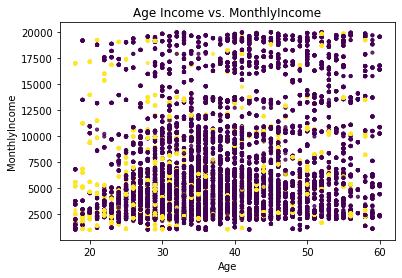

In [ ]:
two_continue_plot(data,'Age','MonthlyIncome','Attrition')